In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *;

import re;
import csv;
import glob;
import sys

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
import geom

%matplotlib inline

In [2]:
def readNDI_csv(filename, nmax=None, startcol=0):
    csvfile=open(filename)
    reader=csv.reader(csvfile)
    text=list(reader)
    csvfile.close()
    
    if re.search( 'Tools', text[0][0]):
        text.pop(0)
        
    if nmax is not None:
        text = text[0:nmax]
    
    err = np.array( list(map( lambda x: x[startcol + 12], text )), dtype='float')
    txyz = np.array( list(map( lambda x: x[startcol + 9:startcol + 12], text )), dtype='float')
    q0xyz = np.array( list(map( lambda x: x[startcol + 5:startcol + 9], text )), dtype='float')
    
    return (q0xyz, txyz, err)

In [4]:
filepath='C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\H115_pulse_echo';

filename='ProbeTip_relative_3_000.csv'

(q0xyz, txyz, err)=readNDI_csv(filepath+'\\'+filename)



In [93]:
match = re.search( '.*\w+_\w+_(\d+)_', filename)

In [34]:
files = glob.glob(filepath+'\\ProbeTip_relative*.csv');

files = glob.glob(filepath+'\\fiducial_*.csv');

for f in files:
    (q0xyz, txyz, err)=readNDI_csv(f, nmax=None, startcol=12)
    geom.write_VTK_points(f[:-3] + 'vtk', txyz)

In [33]:
f='C:\\Users\\Vandiver\\Data\\opti-track\\20150922_Calibration\\max_point_000.csv'
(q0xyz, txyz, err)=readNDI_csv(f, nmax=None, startcol=12)
geom.write_VTK_points(f[:-3] + 'vtk', txyz)

0

In [30]:
txyz

array([[  113.12 , -1743.473],
       [  113.138, -1743.515],
       [  113.14 , -1743.499],
       [  113.126, -1743.539],
       [  113.138, -1743.493],
       [  113.129, -1743.454],
       [  113.13 , -1743.487],
       [  113.115, -1743.54 ],
       [  113.131, -1743.488],
       [  113.13 , -1743.504],
       [  113.13 , -1743.474],
       [  113.125, -1743.536],
       [  113.131, -1743.513],
       [  113.132, -1743.471],
       [  113.125, -1743.529],
       [  113.116, -1743.53 ],
       [  113.125, -1743.5  ],
       [  113.119, -1743.494],
       [  113.124, -1743.485],
       [  113.139, -1743.485],
       [  113.134, -1743.515]])

In [14]:
np.mean(txyz,axis=0)

array([  66.09725,   13.09585,  210.3101 ])

In [15]:
files[0:2]

['C:\\Users\\Vandiver\\Data\\opti-track\\20150922_Calibration\\fiducial_000.csv',
 'C:\\Users\\Vandiver\\Data\\opti-track\\20150922_Calibration\\fiducial_001.csv']

In [3]:
filepath='C:\\Users\\Vandiver\\Data\\opti-track\\20150922_Calibration'

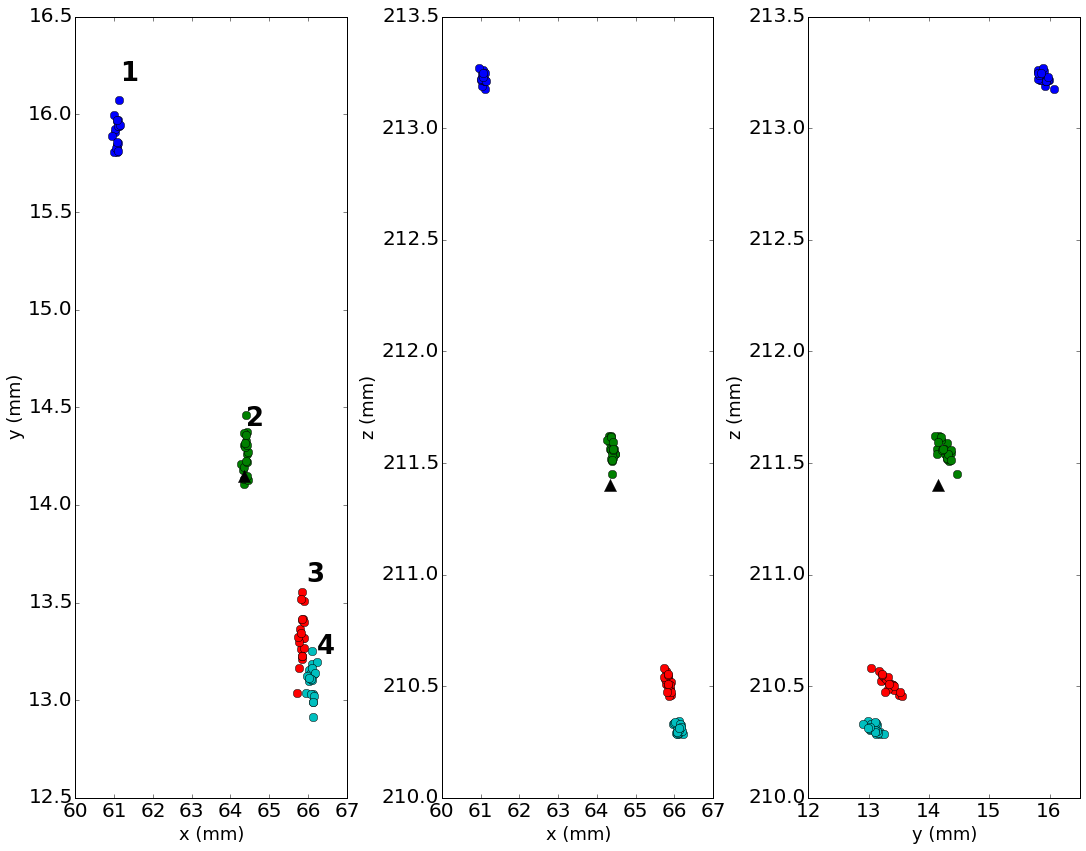

In [43]:
fig = plt.figure(figsize=(18,14), dpi=400)
#ax = fig.gca(projection='3d')
axXY = fig.add_subplot(131)
axXZ = fig.add_subplot(132)
axYZ = fig.add_subplot(133)
fig.subplots_adjust(wspace=0.35)
#p=ax.plot3D(probePositions[:,0], probePositions[:,1], probePositions[:,2], 'x')
files = glob.glob(filepath+'\\ProbeTip_relative*.csv');

#files = glob.glob(filepath+'\\fiducial_*.csv');

allAvg = np.zeros(3);

#files = glob.glob(filepath+'\\ProbeTip_global*.csv');
txyz_list=[]
fi=0;
for f in files:
    (q0xyz, txyz, err)=readNDI_csv(f)
    txyz_list.append(txyz)
    
    allAvg += np.mean(txyz,axis=0)
    #plt.plot(txyz[:,0], txyz[:,1],'.')
    #p=ax.plot3D(txyz[:,0], txyz[:,1], txyz[:,2], 'x')
    
    #filename
    #match = re.search( '.*(\d+).csv', f)
    match = re.search( '.*(\d+)_000.csv', f)
    num=match.group(1)
    axXY.plot(txyz[:,0], txyz[:,1], 'o', markersize=8)
    axXZ.plot(txyz[:,0], txyz[:,2], 'o', markersize=8)
    axYZ.plot(txyz[:,1], txyz[:,2], 'o', markersize=8)
    axXY.text(txyz[0,0]+0.1, txyz[0,1]+0.1, num, fontsize=26, fontweight='bold')
    fi+=1

allAvg/=fi

axXY.plot(allAvg[0], allAvg[1], 'k^', markersize=12)
axXZ.plot(allAvg[0], allAvg[2], 'k^', markersize=12)
axYZ.plot(allAvg[1], allAvg[2], 'k^', markersize=12)

axXY.set_xlabel('x (mm)',fontsize=18)
axXY.set_ylabel('y (mm)',fontsize=18)
axXZ.set_xlabel('x (mm)',fontsize=18)
axXZ.set_ylabel('z (mm)',fontsize=18)
axYZ.set_xlabel('y (mm)',fontsize=18)
axYZ.set_ylabel('z (mm)',fontsize=18)

axXY.tick_params(labelsize=20)
axXZ.tick_params(labelsize=20)
axYZ.tick_params(labelsize=20)

axYZ.set_xticks(np.arange(12.0, 17.0, 1.0))


In [30]:
sum(list( map( lambda l: np.sum((l - allAvg)**2,axis=1), txyz_list )))/4

array([ 6.64145793,  6.58928599,  6.4379057 ,  6.54881781,  6.59694855,
        6.38667983,  6.77169145,  6.48218739,  6.62557929,  6.66847858,
        6.4303433 ,  6.59826652,  6.6243044 ,  6.41859294,  6.53882415,
        6.37116115,  6.61418738,  6.59896215,  6.75100032,  6.61273022])

In [8]:
stdDev = np.sqrt(sum(list( map( lambda l: np.sum((np.mean(l,axis=0) - allAvg)**2) / len(txyz_list), txyz_list ))))
stdDev

2.5584441121509807

In [39]:
allAvg

array([  64.347875 ,   14.1459375,  211.4017   ])

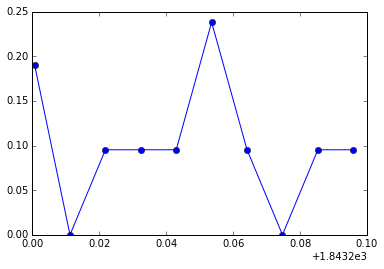

In [79]:
hc,xedges = np.histogram(np.sqrt(np.sum(txyz**2,axis=1)), bins=10)
hc=hc/sum(hc)
xcent=(xedges[0:-1]+xedges[1:])/2.0;
plt.plot(xcent,hc,'o-')

In [ ]:
filepath='C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\20150421-Exp2\\Probe';
filepath='C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\Hydro-Track\\Probe';

files = glob.glob(filepath+'\\*.csv');

def getAverageXYZset(filelist):
    
    probePositions = np.zeros([len(filelist), 3])
    probePosErr = np.zeros([len(filelist),3])
    fi=0;
    for filename in files:
        csvfile=open(filename)
        reader=csv.reader(csvfile)
        text=list(reader)
        csvfile.close()
    
        positions = np.array( list(map( lambda x: x[9:12], text )), dtype='float');
        orientations = np.array( list(map( lambda x: x[5:9], text )), dtype='float');

        avgXYZ = np.mean(positions, axis=0);
        avgErr = np.std(positions, axis=0);
        
    
        probePositions[fi,:] = avgXYZ; 
        probePosErr[fi,:] = avgErr
    
        fi+=1;
        
    return probePositions,probePosErr

def getDeviationSet(filelist):
    probeDeviations =np.array([])
    
    fi=0;
    for filename in files:
        csvfile=open(filename)
        reader=csv.reader(csvfile)
        text=list(reader)
        csvfile.close()
    
        positions = np.array( list(map( lambda x: x[9:12], text )), dtype='float');
        orientations = np.array( list(map( lambda x: x[5:9], text )), dtype='float');

        avgXYZ = np.mean(positions, axis=0);
        avgErr = np.std(positions, axis=0);
        
        probeDeviations = np.append( probeDeviations, np.sqrt( np.sum( (positions - avgXYZ)**2, axis=1) ) );

        fi+=1;
        
    return probeDeviations

probePositions,probePosErr = getAverageXYZset(files)

filepath='C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\Hydro-Track\\Hydro';
hfiles = glob.glob(filepath+'\\*.csv');

hydroPositions,hydroPosErr = getAverageXYZset(hfiles)


In [6]:
files

['C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\H115_pulse_echo\\ProbeTip_relative_1_000.csv',
 'C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\H115_pulse_echo\\ProbeTip_relative_2_000.csv',
 'C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\H115_pulse_echo\\ProbeTip_relative_3_000.csv',
 'C:\\Users\\Vandiver\\Documents\\HiFU\\optical_tracking\\H115_pulse_echo\\ProbeTip_relative_4_000.csv']